In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset 

In [2]:
df1 = pd.read_csv('car data.csv')
df2 = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
df1.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df2.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


# Data Preprocessing

In [7]:
df2 = df2.rename(columns={
    "name": "Car_Name",
    "year": "Year",
    "selling_price": "Selling_Price",
    "km_driven": "Kms_Driven",
    "fuel": "Fuel_Type",
    "seller_type": "Seller_Type",
    "transmission": "Transmission",
    "owner": "Owner"
})

In [8]:
owner_mapping = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 0}
df2['Owner'] = df2['Owner'].map(owner_mapping)

In [9]:
df = pd.concat([df1, df2], ignore_index=True, sort=False)

In [10]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
df.isnull().sum()

Car_Name            0
Year                0
Selling_Price       0
Present_Price    4340
Kms_Driven          0
Fuel_Type           0
Seller_Type         0
Transmission        0
Owner               0
dtype: int64

In [12]:
df.shape

(4641, 9)

In [13]:
print("Missing values before imputation:")
print(df.isnull().sum())

Missing values before imputation:
Car_Name            0
Year                0
Selling_Price       0
Present_Price    4340
Kms_Driven          0
Fuel_Type           0
Seller_Type         0
Transmission        0
Owner               0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer
imputer_numerical = SimpleImputer(strategy='median')
df['Present_Price'] = imputer_numerical.fit_transform(df[['Present_Price']])

In [16]:
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [17]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071.0,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796.0,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429.0,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273.0,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367.0,Diesel,Dealer,Manual,0


In [18]:
df['Age'] = 2025 - df['Year']
df.drop('Year', axis=1, inplace=True)
df['Kms_Driven_Per_Age'] = df['Kms_Driven'] / (df['Age'] + 1)

In [19]:
df['Car_Manufacturer'] = df['Car_Name'].apply(lambda x: x.split()[0].lower())
df.drop('Car_Name', axis=1, inplace=True)

In [21]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,Kms_Driven_Per_Age,Car_Manufacturer
0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0,11,2250.000000,ritz
1,4.75,9.54,43000.0,Diesel,Dealer,Manual,0,12,3307.692308,sx4
2,7.25,9.85,6900.0,Petrol,Dealer,Manual,0,8,766.666667,ciaz
3,2.85,4.15,5200.0,Petrol,Dealer,Manual,0,14,346.666667,wagon
4,4.60,6.87,42450.0,Diesel,Dealer,Manual,0,11,3537.500000,swift


In [22]:
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission', 'Car_Manufacturer'], drop_first=True)

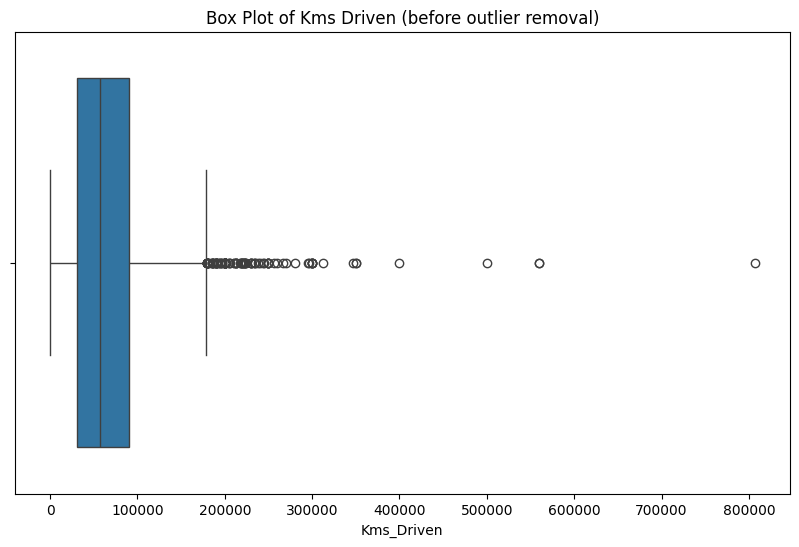

In [23]:
# Visualize outliers with a box plot before removal
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Kms_Driven'])
plt.title('Box Plot of Kms Driven (before outlier removal)')
plt.show()

In [24]:
q_low = df_encoded['Kms_Driven'].quantile(0.01)
q_high = df_encoded['Kms_Driven'].quantile(0.99)
df_encoded = df_encoded[(df_encoded['Kms_Driven'] > q_low) & (df_encoded['Kms_Driven'] < q_high)]

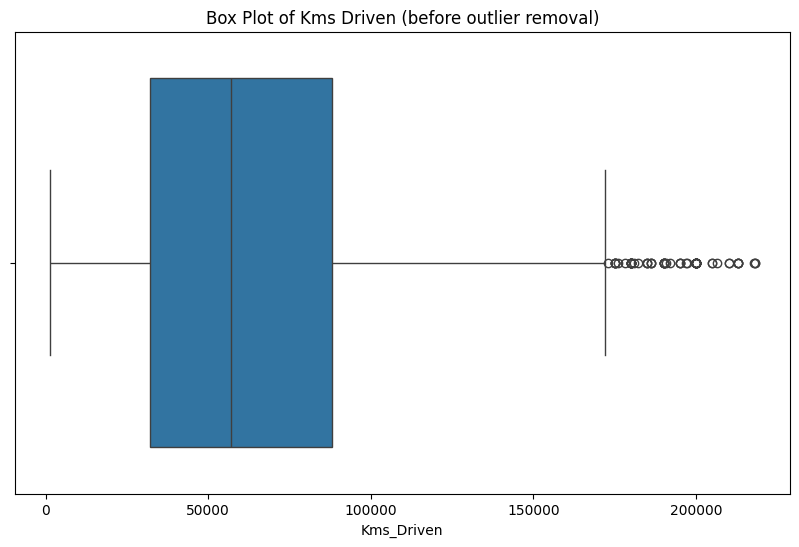

In [25]:
# Visualize outliers with a box plot before removal
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_encoded['Kms_Driven'])
plt.title('Box Plot of Kms Driven (before outlier removal)')
plt.show()

In [26]:
df_encoded.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Kms_Driven_Per_Age,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,...,Car_Manufacturer_toyota,Car_Manufacturer_tvs,Car_Manufacturer_um,Car_Manufacturer_verna,Car_Manufacturer_vitara,Car_Manufacturer_volkswagen,Car_Manufacturer_volvo,Car_Manufacturer_wagon,Car_Manufacturer_xcent,Car_Manufacturer_yamaha
0,3.35,5.59,27000.0,0,11,2250.000000,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,4.75,9.54,43000.0,0,12,3307.692308,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7.25,9.85,6900.0,0,8,766.666667,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,2.85,4.15,5200.0,0,14,346.666667,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,4.60,6.87,42450.0,0,11,3537.500000,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Exploratory Data Analysis (EDA)

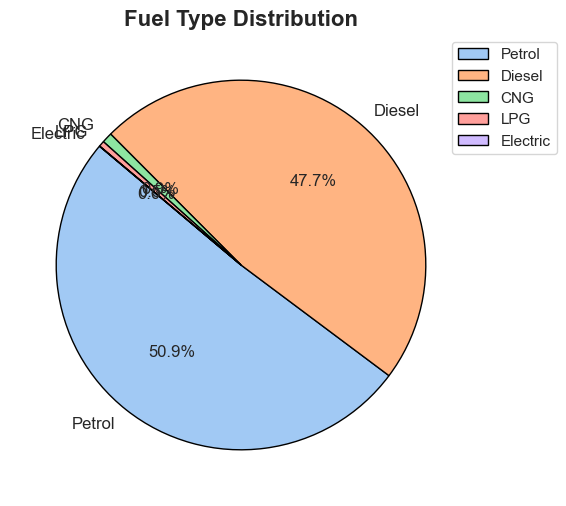

In [27]:
sns.set(style="whitegrid")

colors = sns.color_palette("pastel")

plt.figure(figsize=(6,6))
df['Fuel_Type'].value_counts().plot.pie(
    autopct='%1.1f%%',      
    startangle=140,          
    colors=colors,           
    wedgeprops={'edgecolor':'black'},  
    textprops={'fontsize':12} 
)

plt.title("Fuel Type Distribution", fontsize=16, weight='bold')
plt.ylabel("")  
plt.legend(
    labels=df['Fuel_Type'].value_counts().index,
    loc="upper right",
    bbox_to_anchor=(1.2,1)
)
plt.show()

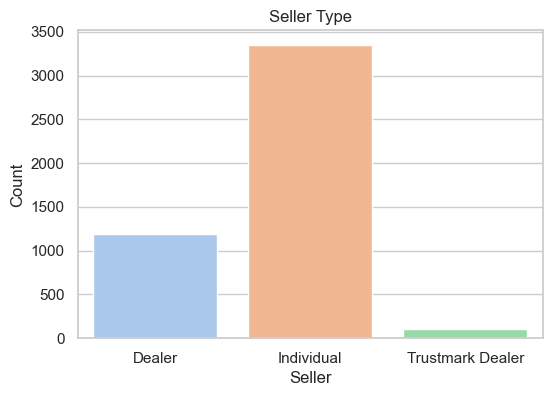

In [28]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Seller_Type', hue='Seller_Type', data=df, 
                   palette="pastel", legend=False)

plt.title("Seller Type")
plt.xlabel("Seller")
plt.ylabel("Count")
plt.show()


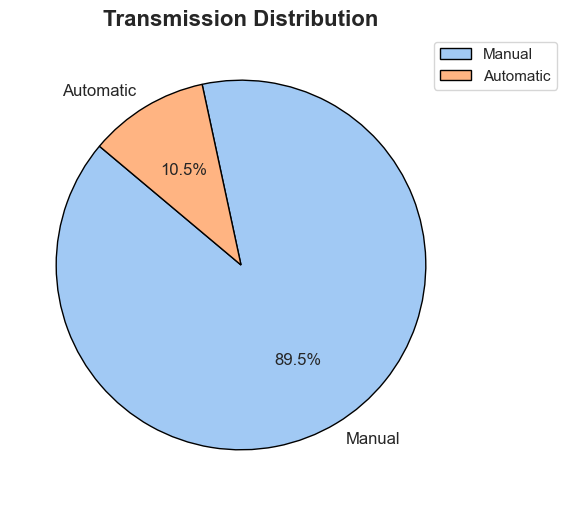

In [29]:
sns.set(style="whitegrid")

colors = sns.color_palette("pastel")

plt.figure(figsize=(6,6))
df['Transmission'].value_counts().plot.pie(
    autopct='%1.1f%%',      
    startangle=140,          
    colors=colors,           
    wedgeprops={'edgecolor':'black'},  
    textprops={'fontsize':12} 
)

plt.title("Transmission Distribution", fontsize=16, weight='bold')
plt.ylabel("")  
plt.legend(
    labels=df['Transmission'].value_counts().index,
    loc="upper right",
    bbox_to_anchor=(1.2,1)
)
plt.show()

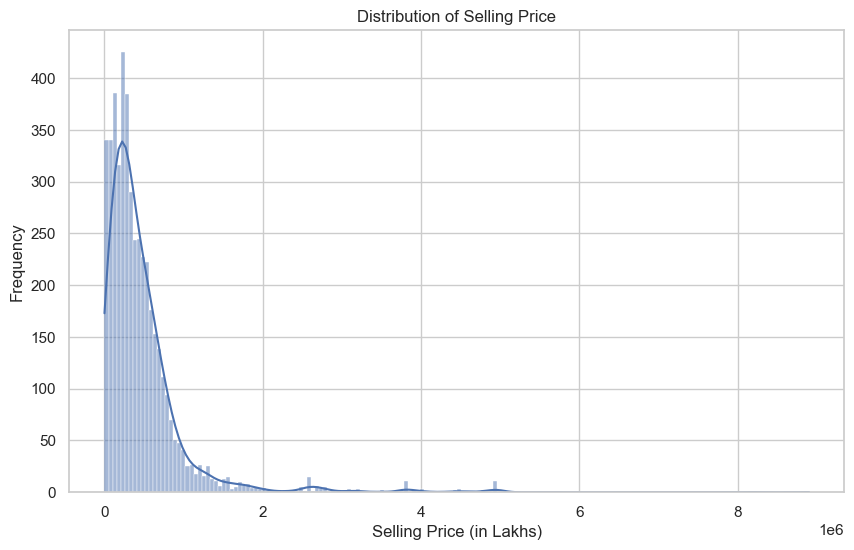

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price (in Lakhs)')
plt.ylabel('Frequency')
plt.show()

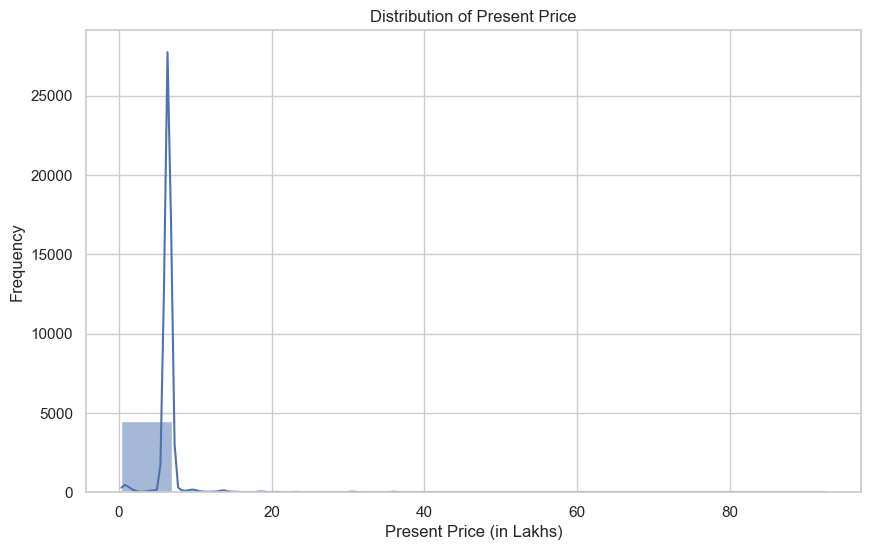

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Present_Price'], kde=True)
plt.title('Distribution of Present Price')
plt.xlabel('Present Price (in Lakhs)')
plt.ylabel('Frequency')
plt.show()

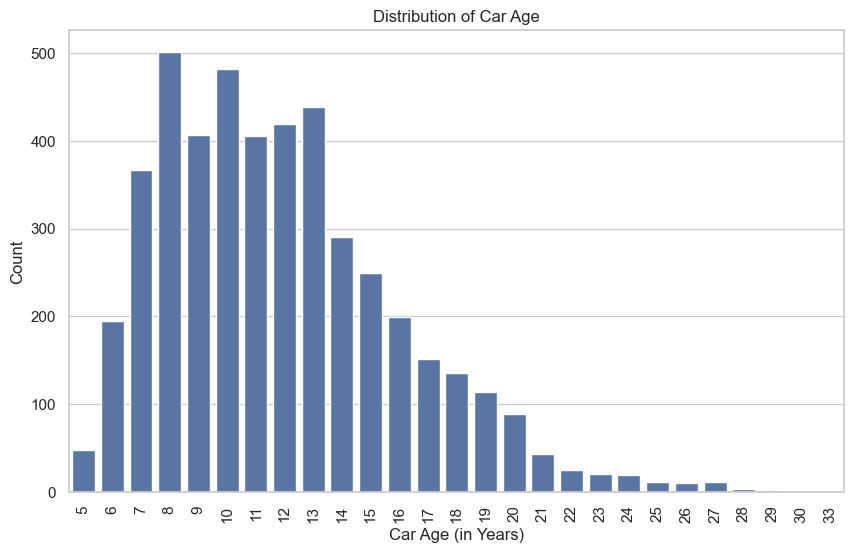

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Age'])
plt.title('Distribution of Car Age')
plt.xlabel('Car Age (in Years)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

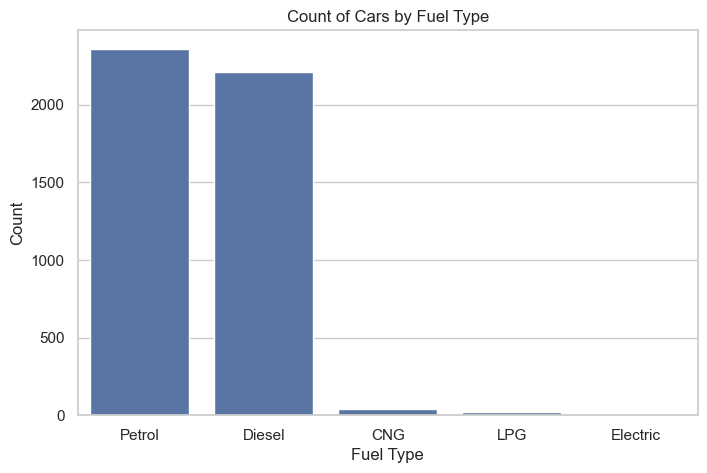

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Fuel_Type', data=df)
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

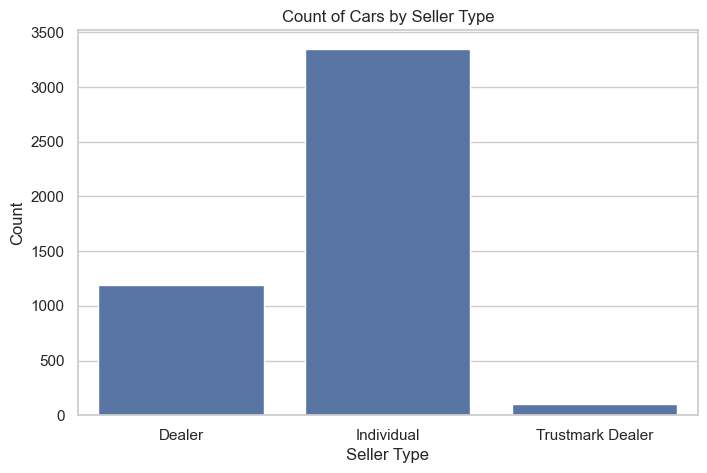

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Seller_Type', data=df)
plt.title('Count of Cars by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.show()

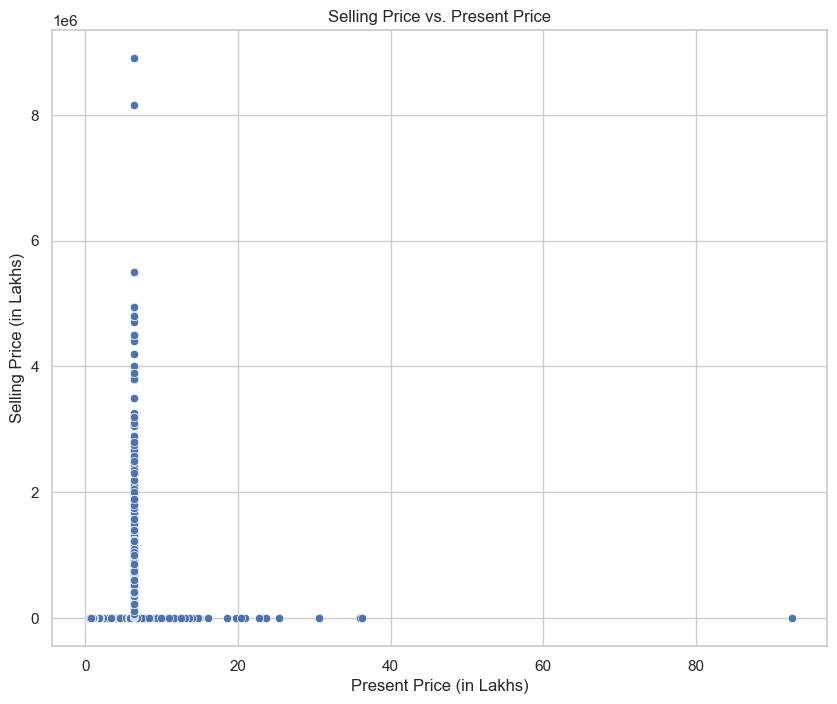

In [35]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Selling Price vs. Present Price')
plt.xlabel('Present Price (in Lakhs)')
plt.ylabel('Selling Price (in Lakhs)')
plt.show()

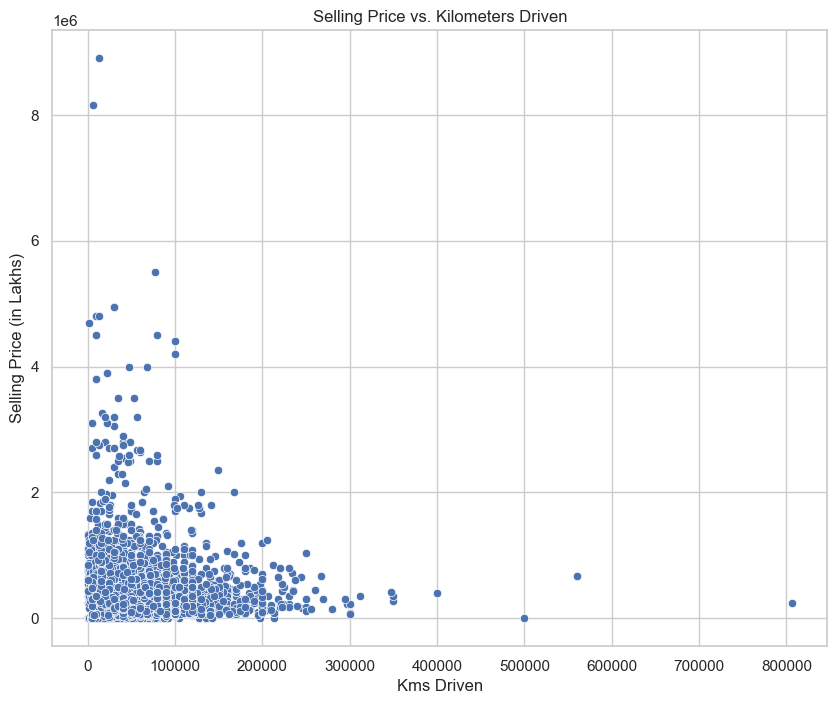

In [36]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Kms_Driven', y='Selling_Price', data=df)
plt.title('Selling Price vs. Kilometers Driven')
plt.xlabel('Kms Driven')
plt.ylabel('Selling Price (in Lakhs)')
plt.show()

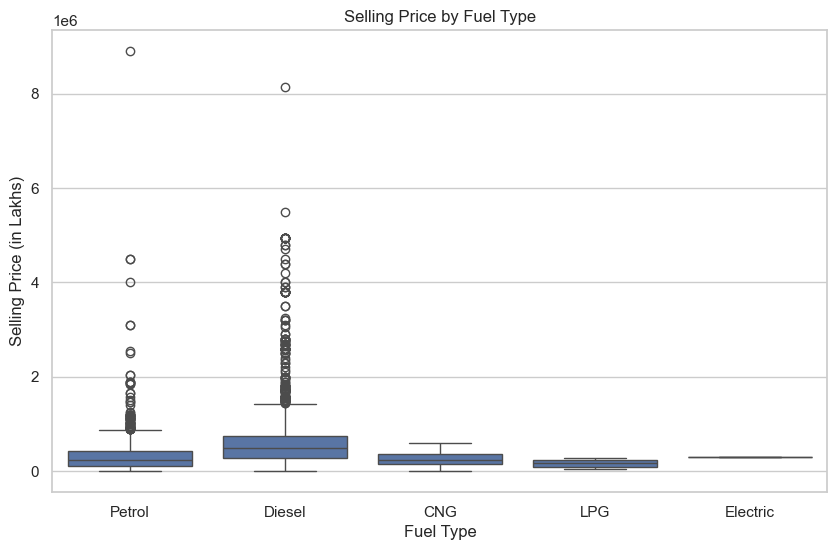

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price (in Lakhs)')
plt.show()

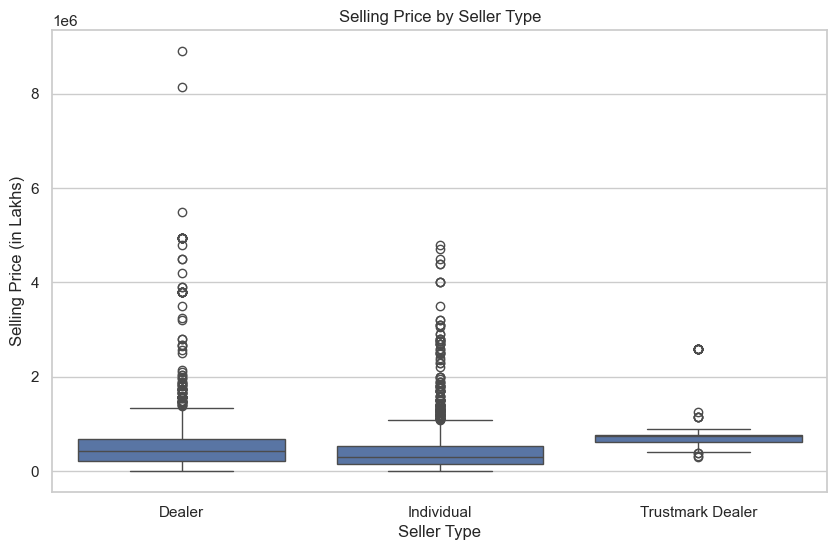

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seller_Type', y='Selling_Price', data=df)
plt.title('Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price (in Lakhs)')
plt.show()

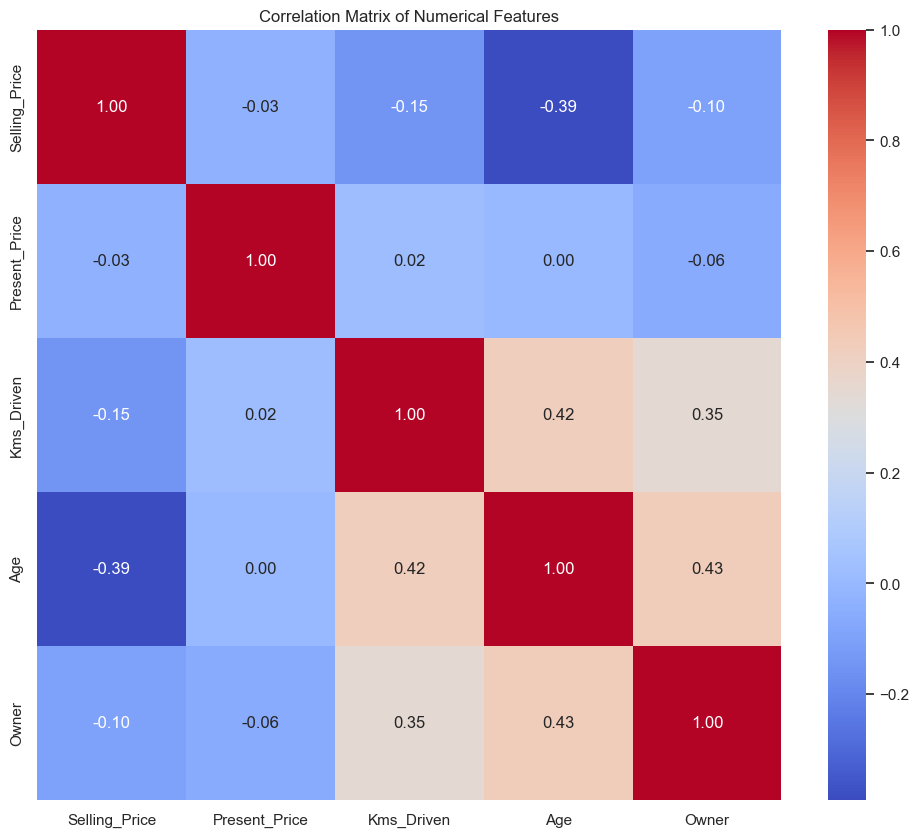

In [39]:
plt.figure(figsize=(12, 10))
numerical_features = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age', 'Owner']
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

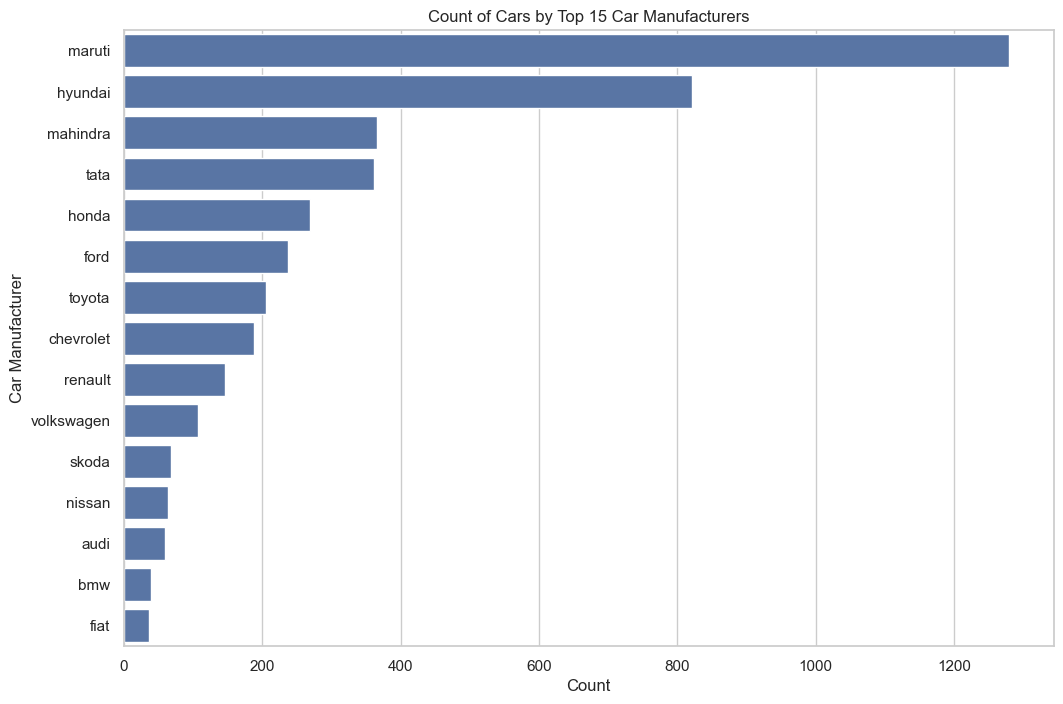

In [40]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Car_Manufacturer', data=df, order=df['Car_Manufacturer'].value_counts().iloc[:15].index)
plt.title('Count of Cars by Top 15 Car Manufacturers')
plt.xlabel('Count')
plt.ylabel('Car Manufacturer')
plt.show()

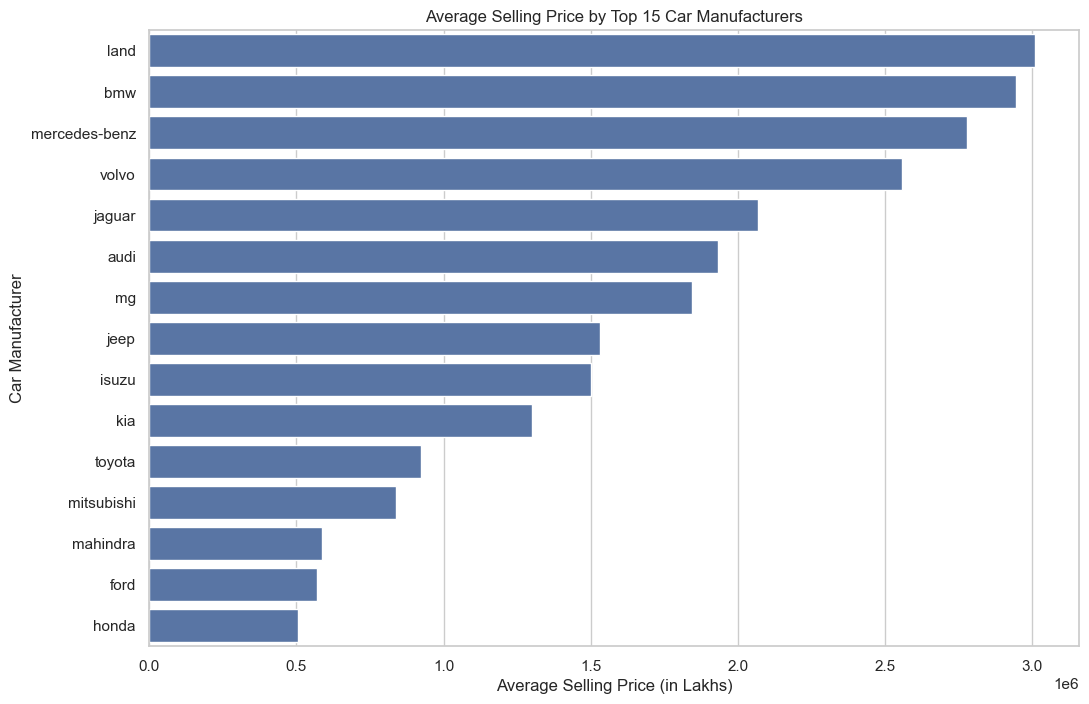

In [41]:
avg_price_by_brand = df.groupby('Car_Manufacturer')['Selling_Price'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_price_by_brand.values, y=avg_price_by_brand.index)
plt.title('Average Selling Price by Top 15 Car Manufacturers')
plt.xlabel('Average Selling Price (in Lakhs)')
plt.ylabel('Car Manufacturer')
plt.show()

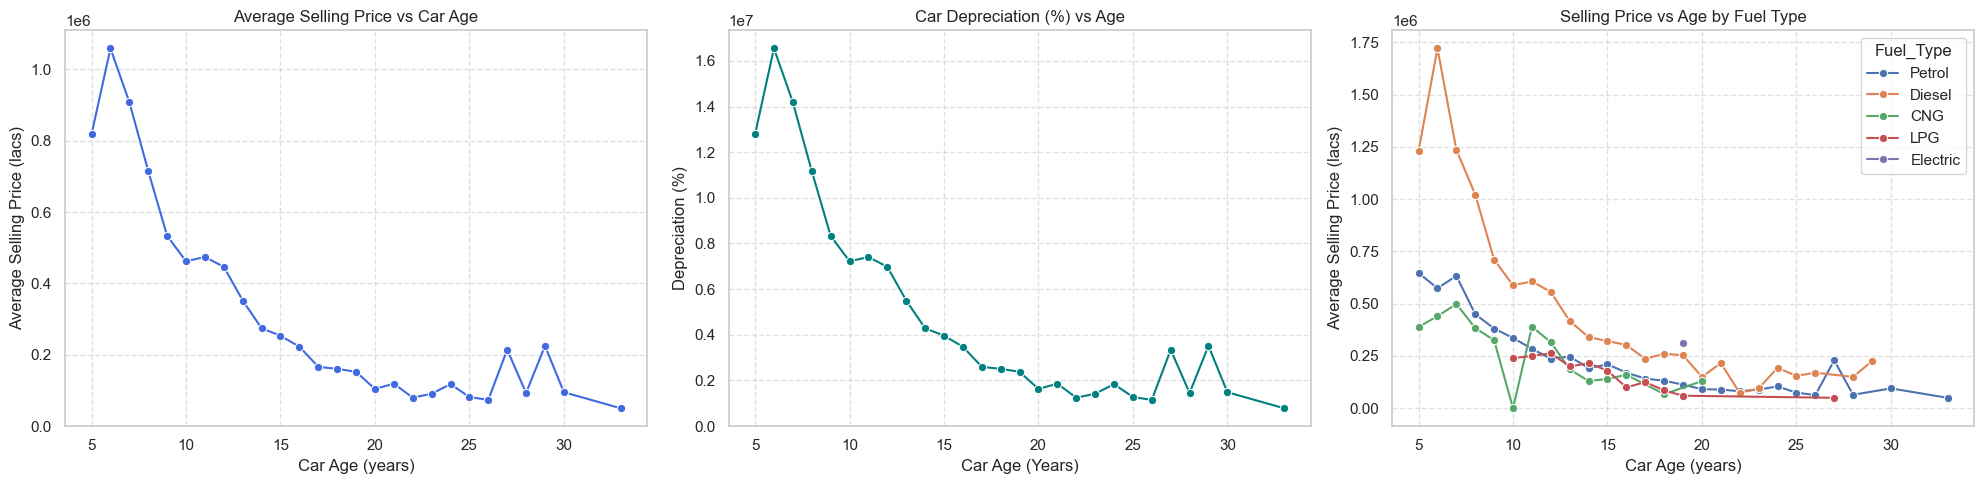

In [42]:
df["Depreciation"] = (df["Selling_Price"] / df["Present_Price"]) * 100

fig, axes = plt.subplots(1, 3, figsize=(20,5))

# (1) Average Selling Price vs Car Age
sns.lineplot(x='Age', y='Selling_Price', data=df, estimator='mean', 
             errorbar=None, marker='o', color="royalblue", ax=axes[0])
axes[0].set_title("Average Selling Price vs Car Age")
axes[0].set_xlabel("Car Age (years)")
axes[0].set_ylabel("Average Selling Price (lacs)")
axes[0].grid(True, linestyle="--", alpha=0.6)

# (2) Depreciation vs Car Age
sns.lineplot(x="Age", y="Depreciation", data=df, marker="o", 
             errorbar=None, color="teal", ax=axes[1])
axes[1].set_title("Car Depreciation (%) vs Age")
axes[1].set_xlabel("Car Age (Years)")
axes[1].set_ylabel("Depreciation (%)")
axes[1].grid(True, linestyle="--", alpha=0.6)

# (3) Selling Price vs Age by Fuel Type
sns.lineplot(x="Age", y="Selling_Price", data=df, hue="Fuel_Type", 
             estimator="mean", errorbar=None, marker="o", ax=axes[2])
axes[2].set_title("Selling Price vs Age by Fuel Type")
axes[2].set_xlabel("Car Age (years)")
axes[2].set_ylabel("Average Selling Price (lacs)")
axes[2].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


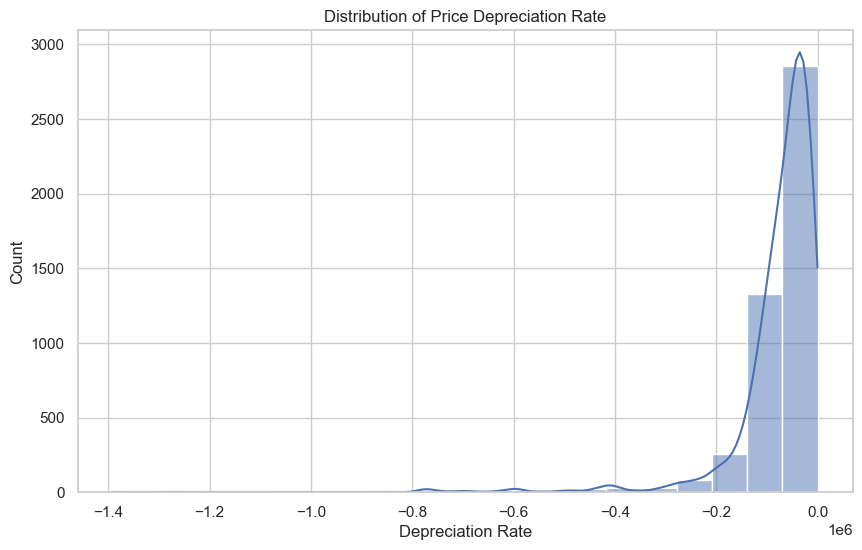

In [43]:
df['Depreciation_Rate'] = (df['Present_Price'] - df['Selling_Price']) / df['Present_Price']
plt.figure(figsize=(10, 6))
sns.histplot(df['Depreciation_Rate'], bins=20, kde=True)
plt.title('Distribution of Price Depreciation Rate')
plt.xlabel('Depreciation Rate')
plt.show()

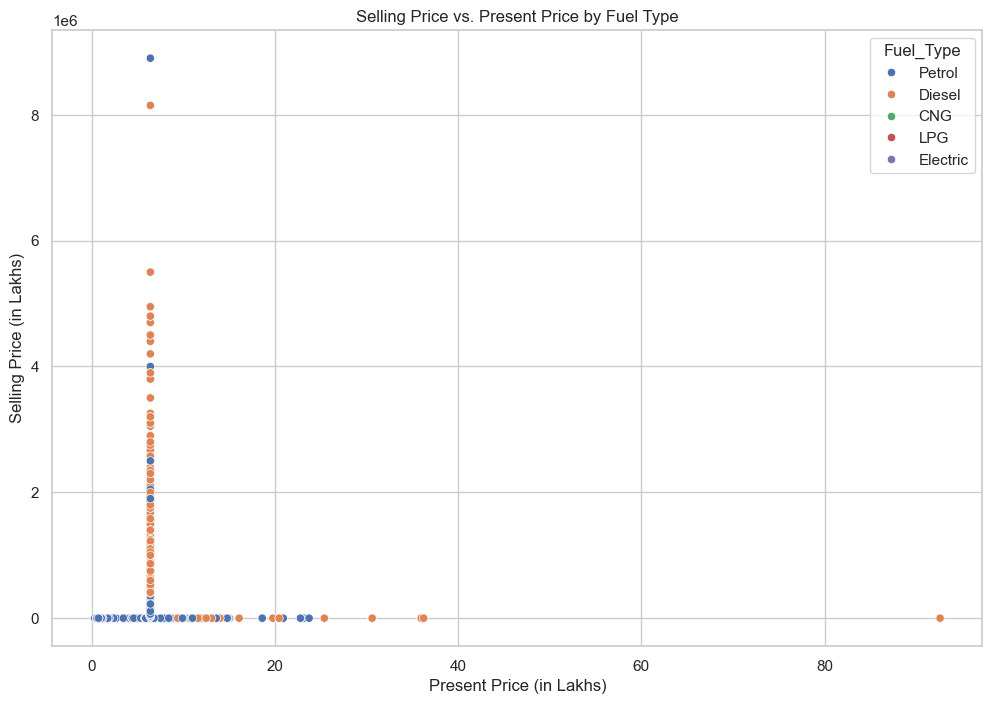

In [44]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Present_Price', y='Selling_Price', hue='Fuel_Type', data=df)
plt.title('Selling Price vs. Present Price by Fuel Type')
plt.xlabel('Present Price (in Lakhs)')
plt.ylabel('Selling Price (in Lakhs)')
plt.show()

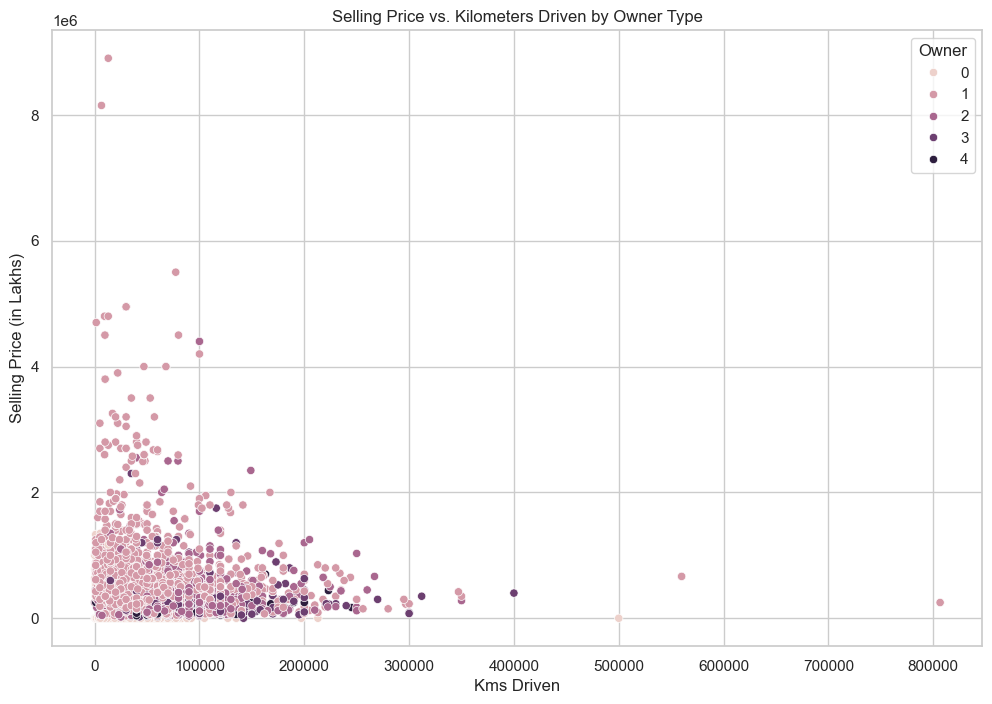

In [45]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Kms_Driven', y='Selling_Price', hue='Owner', data=df)
plt.title('Selling Price vs. Kilometers Driven by Owner Type')
plt.xlabel('Kms Driven')
plt.ylabel('Selling Price (in Lakhs)')
plt.show()

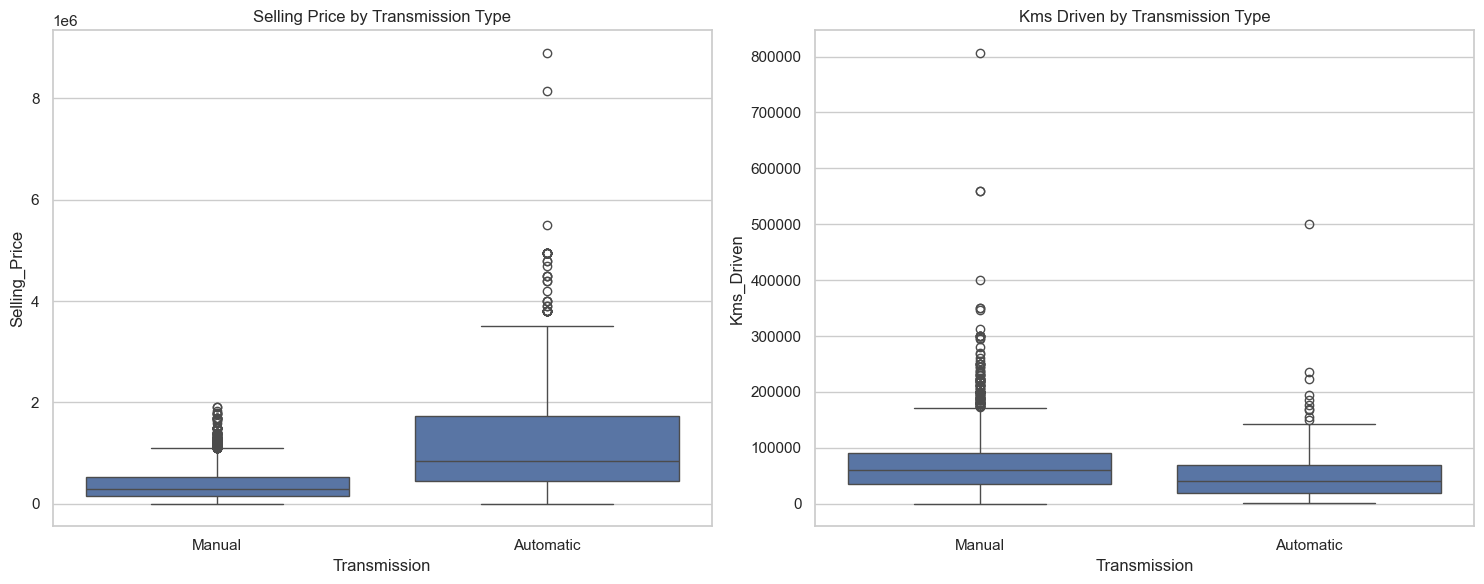

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(x='Transmission', y='Selling_Price', data=df, ax=axes[0])
axes[0].set_title('Selling Price by Transmission Type')
sns.boxplot(x='Transmission', y='Kms_Driven', data=df, ax=axes[1])
axes[1].set_title('Kms Driven by Transmission Type')
plt.tight_layout()
plt.show()

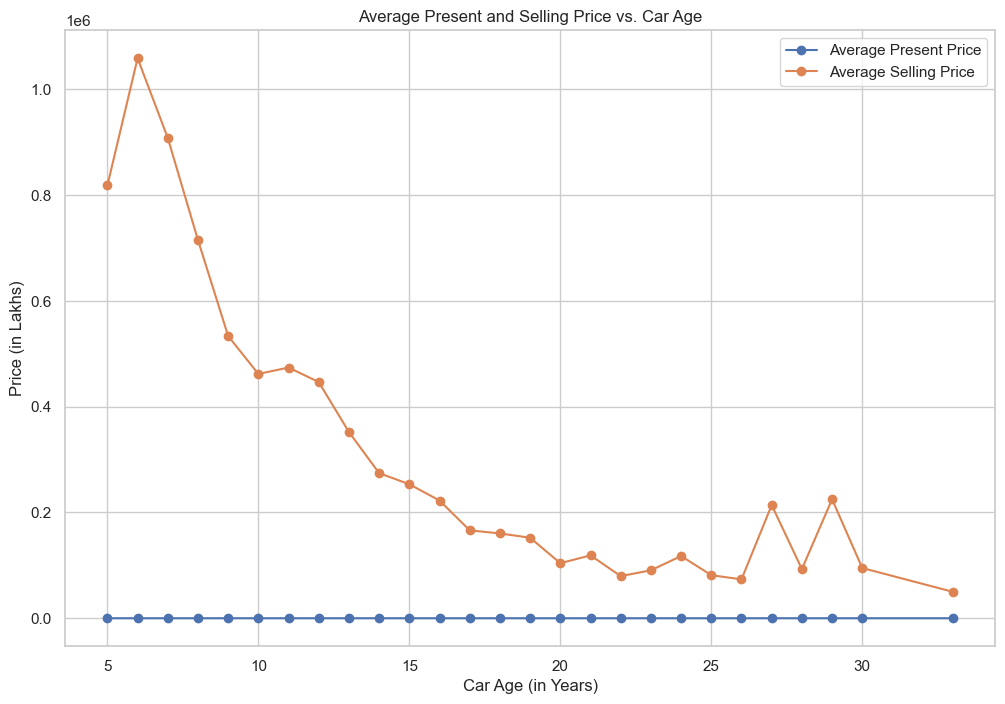

In [47]:
avg_prices = df.groupby('Age')[['Present_Price', 'Selling_Price']].mean().reset_index()
plt.figure(figsize=(12, 8))
plt.plot(avg_prices['Age'], avg_prices['Present_Price'], marker='o', label='Average Present Price')
plt.plot(avg_prices['Age'], avg_prices['Selling_Price'], marker='o', label='Average Selling Price')
plt.title('Average Present and Selling Price vs. Car Age')
plt.xlabel('Car Age (in Years)')
plt.ylabel('Price (in Lakhs)')
plt.legend()
plt.grid(True)
plt.show()

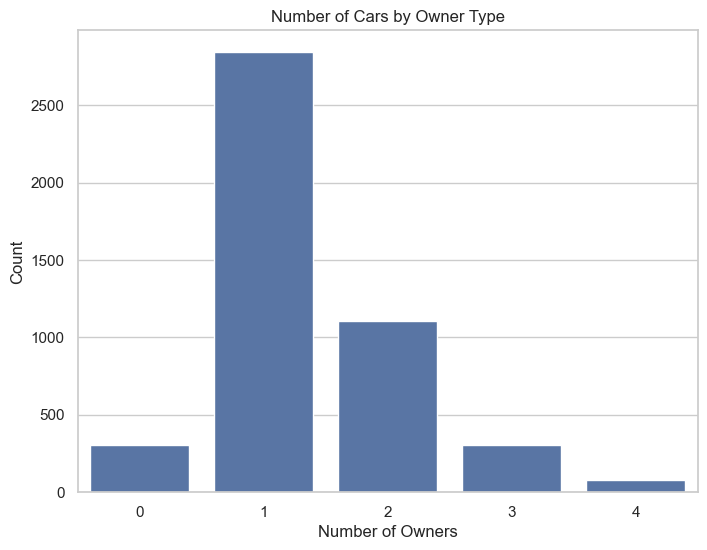

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Owner', data=df)
plt.title('Number of Cars by Owner Type')
plt.xlabel('Number of Owners')
plt.ylabel('Count')
plt.show()

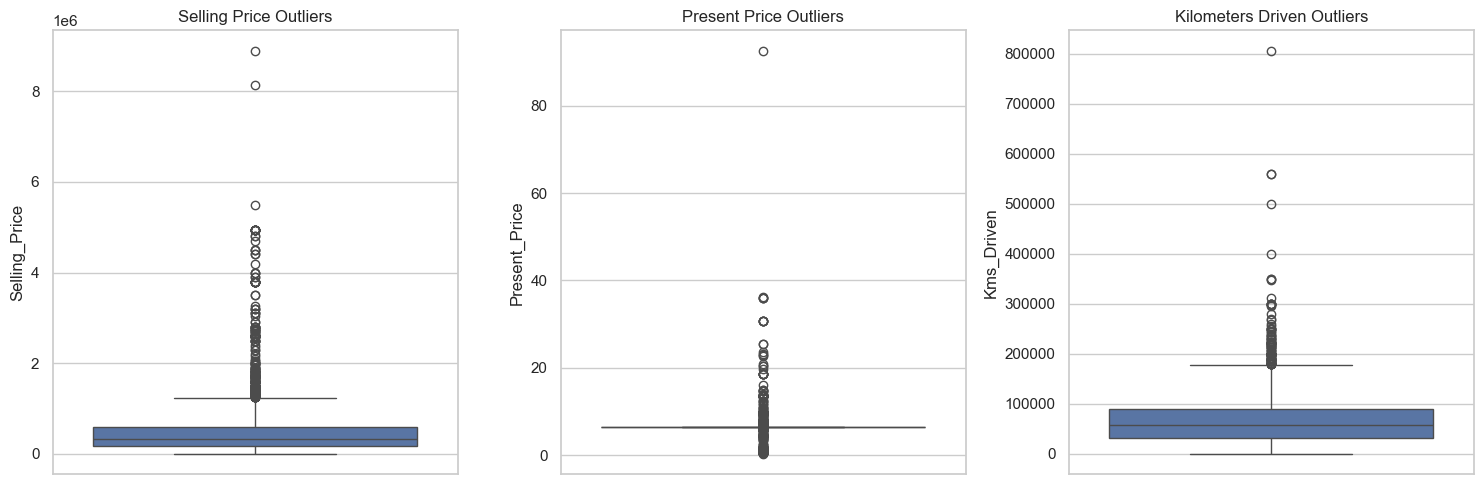

In [49]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y='Selling_Price', data=df)
plt.title('Selling Price Outliers')

plt.subplot(1, 3, 2)
sns.boxplot(y='Present_Price', data=df)
plt.title('Present Price Outliers')

plt.subplot(1, 3, 3)
sns.boxplot(y='Kms_Driven', data=df)
plt.title('Kilometers Driven Outliers')

plt.tight_layout()
plt.show()

In [50]:
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score


In [53]:
scaler = StandardScaler()
numerical_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Age']

In [54]:
numerical_cols_to_scale = ['Kms_Driven', 'Age', 'Kms_Driven_Per_Age']
X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

In [55]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

In [56]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [57]:
print(f"Best hyperparameters: {grid_search.best_params_}")
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [58]:
print("------ Best Random Forest Regressor ------")
print("Train R2 score", best_rf.score(X_train, y_train))
print("Test R2 Score:", r2_score(y_test, y_pred))
print("Cross-Validation Score:", cross_val_score(best_rf, X_train, y_train, cv=5).mean())

------ Best Random Forest Regressor ------
Train R2 score 0.9639661175427212
Test R2 Score: 0.8900010980388867
Cross-Validation Score: 0.7542850262188974


In [59]:
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}
gb_grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid, cv=3, n_jobs=-1, verbose=2)
# This will now work without the ValueError
gb_grid_search.fit(X_train, y_train)

best_gb = gb_grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [60]:
print("------ Best Gradient Boosting Regressor ------")
print("Train R2 score", best_gb.score(X_train, y_train))
print("Test R2 Score:", r2_score(y_test, best_gb.predict(X_test)))
print("Cross-Validation Score:", cross_val_score(best_gb, X_train, y_train, cv=5).mean())

------ Best Gradient Boosting Regressor ------
Train R2 score 0.9307762539408129
Test R2 Score: 0.8787595338896237
Cross-Validation Score: 0.7801664998835112
